<a href="https://colab.research.google.com/github/zhumenglvke/project/blob/main/jupyter%20notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('hello world')

hello world


In [2]:
import time
time.sleep(3)

In [3]:
def say_hello(recipient):
    return 'hello,{}!'.format(recipient)
say_hello('Tim')

'hello,Tim!'

**bold**

*bold*

![Alt text](https://www.dataquest.io/wp-content/uploads/2023/02/DQ-Logo.svg)

In [4]:
print('hello')

hello


# project

In [5]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [8]:
df = pd.read_csv('/content/fortune500.csv')

In [9]:
df.columns = ['year','rank','company','revenue','profit']

In [10]:
df.dtypes

,0
year,int64
rank,int64
company,object
revenue,float64
profit,object


In [12]:
df.info()
#使用info()查看就会看不到缺失值，profit中缺失值不是使用的NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     25500 non-null  int64  
 1   rank     25500 non-null  int64  
 2   company  25500 non-null  object 
 3   revenue  25500 non-null  float64
 4   profit   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


In [14]:
#查看profit中的缺失值
non_numberic_profits = df.profit.str.contains('[^0-9.-]')#此处为正则表达式匹配
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [15]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [16]:
len(df.profit[non_numberic_profits])

369

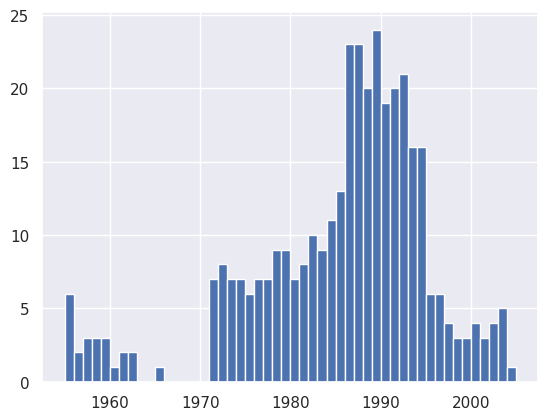

In [17]:
bins_sizes,_,_ = plt.hist(df.year[non_numberic_profits],bins=range(1955,2006))

In [18]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25131 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     25131 non-null  int64  
 1   rank     25131 non-null  int64  
 2   company  25131 non-null  object 
 3   revenue  25131 non-null  float64
 4   profit   25131 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ MB


# Plotting with matplotlib

In [20]:
# 以年龄进行分组
group_by_year = df.loc[:,['year','revenue','profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
  ax.set_title(title)
  ax.set_ylabel(y_label)
  ax.plot(x, y)
  ax.margins(x=0, y=0)

In [22]:
avgs

,revenue,profit
year,,
1955,275.754453,16.732186
1956,323.604418,22.509237
1957,350.037626,23.181087
1958,377.977264,23.456740
1959,355.229376,19.279276
1960,395.231864,24.019439
1961,410.552410,23.340361
1962,419.556827,23.326104
1963,458.164200,26.965000


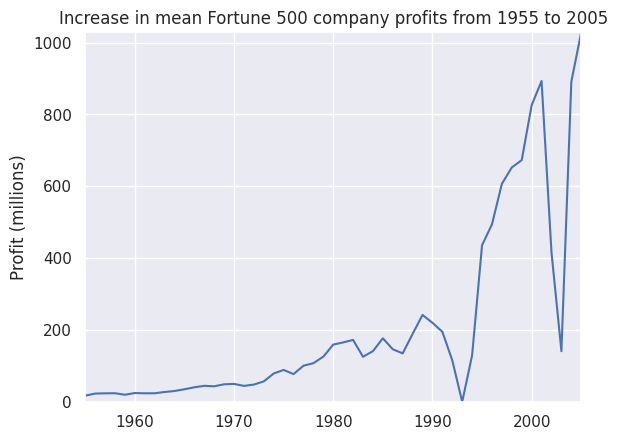

In [21]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

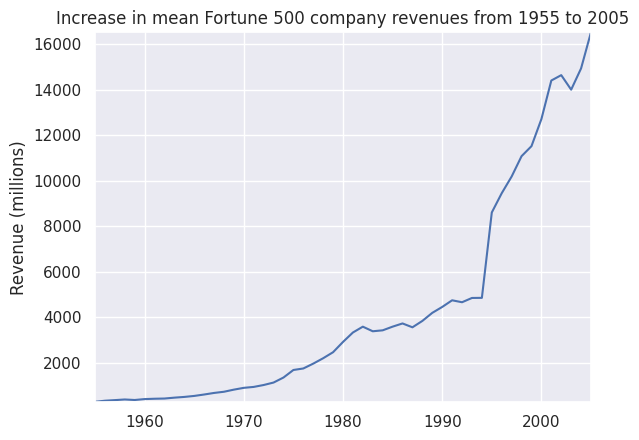

In [24]:
y2 = avgs.revenue
flg, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

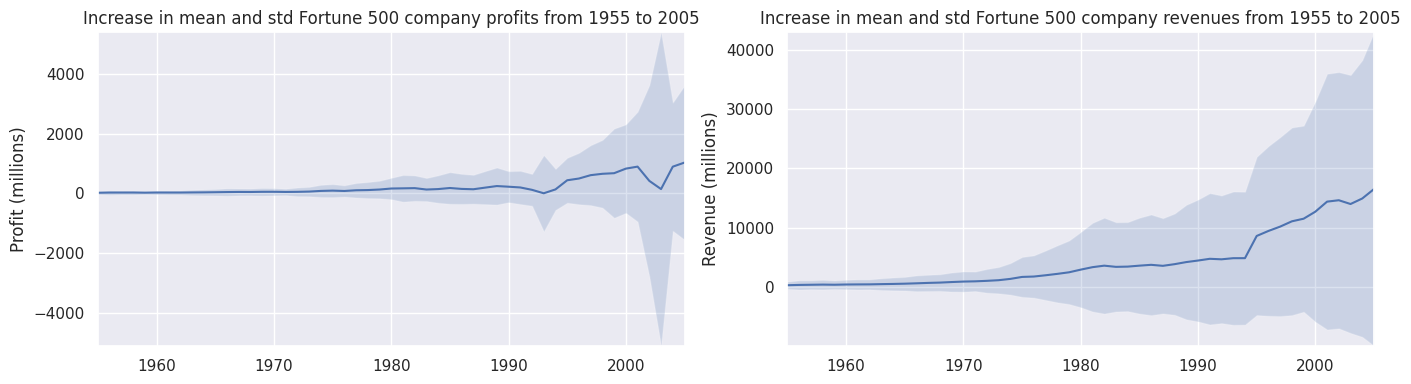

In [25]:
#用于画标准差折线图
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)#用于填充区域
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
# 求标准差
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values

plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')

fig.set_size_inches(14, 4)
fig.tight_layout()